<a href="https://colab.research.google.com/github/alixintong/btt-ai-know-your-customer/blob/bless/Letter_and_Magazine_Cropping_and_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# this cell allows access to our folder

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
root_path = '/content/gdrive/MyDrive/BTTAI_AmericanExpress1'

Mounted at /content/drive


In [2]:
# cell for imports - add as needed
import torch 
import cv2
import numpy as np 
import pandas as pd
import os, os.path
import re
from fastai.vision.all import *

These are the paths to get to the Magazine and Letter frames folders

In [3]:
path_letterCombined = '/content/drive/MyDrive/BTTAI_AmericanExpress1/datasets/sampleDataset/frames/letter001_combined' #path to folder
path_frames = '/content/drive/MyDrive/BTTAI_AmericanExpress1/datasets/sampleDataset/frames' #path to folder
path_magCombined = '/content/drive/MyDrive/BTTAI_AmericanExpress1/datasets/sampleDataset/frames/magazine001_combined' #path to folder



### Letter Frames Cropping and Binary Classification

This is to know the number of files in the folder

In [36]:
files_letter = get_image_files(path_letterCombined)
len(files_letter)

352

In [37]:
files_letter[0],files_letter[350]

(Path('/content/drive/MyDrive/BTTAI_AmericanExpress1/datasets/sampleDataset/frames/letter001_combined/letter001_frames_00163.jpg'),
 Path('/content/drive/MyDrive/BTTAI_AmericanExpress1/datasets/sampleDataset/frames/letter001_combined/Letter001_frames_no_doc_00016.jpg'))

In [49]:
gt_letter = '/content/drive/MyDrive/BTTAI_AmericanExpress1/datasets/sampleDataset/input_sample_groundtruth/background00_gt/letter001_BN.gt.csv' #path to letter frames' groundtruth
df_letter = pd.read_csv(gt_letter)
df_letter.head()

,point/0/_name,point/0/_x,point/0/_y,point/1/_name,point/1/_x,point/1/_y,point/2/_name,point/2/_x,point/2/_y,point/3/_name,point/3/_x,point/3/_y,_index,_rejected
0,bl,703.838,821.867,tl,698.301,223.969,tr,1127.11,225.648,br,1216.89,799.264,1,False
1,bl,702.118,822.136,tl,696.436,224.119,tr,1125.88,226.403,br,1215.78,800.164,2,False
2,bl,701.706,823.286,tl,696.182,225.742,tr,1124.90,227.576,br,1215.36,801.663,3,False
3,bl,702.937,823.223,tl,697.259,226.687,tr,1125.50,229.178,br,1215.80,801.339,4,False
4,bl,703.555,821.741,tl,698.101,225.573,tr,1126.22,228.164,br,1216.56,800.871,5,False


In [39]:
#df["_accepted"] = df["_rejected"].apply(lambda x: not x) #To add a column called "_accepted" with values that are opposite to the values in variable "_rejected"
#df.head()

I was experiencing errors with the way I named the files. I had to pull Han's *while loop* method to rename the files

In [ ]:
lt_img_number = 1 
while lt_img_number <= 176: #while loop to read, crop and name file
  number = ("%05d" % lt_img_number)
  img_str = (path_frames + "/" + "letter001_frames/letter001_frames_%s.jpg" % (number))
  img = Image.open(img_str)
  img2 = img.crop((0, 0,  df_letter['point/0/_x'][lt_img_number-1], df_letter['point/0/_y'][lt_img_number-1])) #subtracting 1 because the cvs table starts at 0 
  img2.save(("/content/drive/MyDrive/BTTAI_AmericanExpress1/datasets/sampleDataset/frames/letter001_frames_no_doc/Letter001_frames_no_doc_%s.jpg")% (number))
  lt_img_number+=1

In [41]:
def label_func(f): return f[0].isupper() #label #I am not sure what this does, I played around with it and got other result, so I stuch to 0 which gives the desired result

In [42]:
dls_letter = ImageDataLoaders.from_name_func(path_letterCombined, files_letter, label_func, item_tfms=Resize(224))

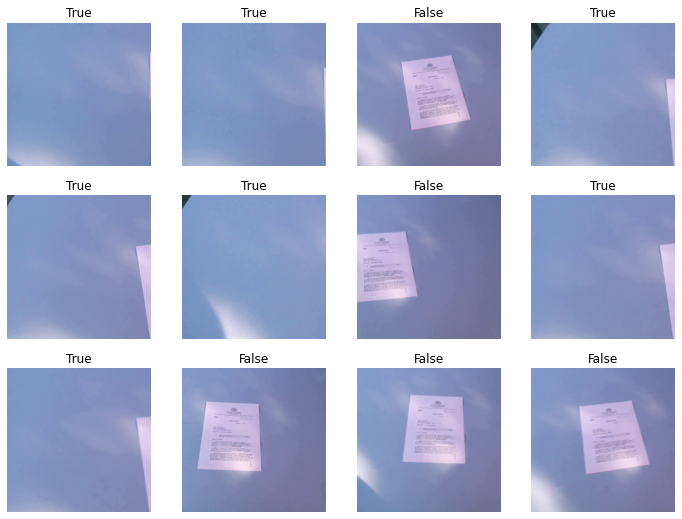

In [43]:
dls_letter.show_batch(max_n = 12) #displays 12 images

### Magazine Frames Cropping and Binary Classification

In [52]:
mg_img_number = 1 #while loop to read, crop and name file
while mg_img_number <= 198:
  number = ("%05d" % mg_img_number)
  img_str = (path_frames + "/" + "magazine001_frames/magazine001_frames_%s.jpg" % (number))
  img = Image.open(img_str)
  img2 = img.crop((0, 0,  df_mag['point/0/_x'][mg_img_number-1], df_mag['point/0/_y'][mg_img_number-1])) #subtracting 1 because the cvs table starts at 0 
  img2.save(("/content/drive/MyDrive/BTTAI_AmericanExpress1/datasets/sampleDataset/frames/magazine001_frames_no_doc/Magazine001_frames_no_doc_%s.jpg")% (number))
  mg_img_number+=1

In [66]:
files_mag = get_image_files(path_magCombined)
len(files_mag)

394

In [ ]:
files_mag[0],files_mag[350]

(Path('/content/drive/MyDrive/BTTAI_AmericanExpress1/datasets/sampleDataset/frames/letter001_combined/letter001_frames_00163.jpg'),
 Path('/content/drive/MyDrive/BTTAI_AmericanExpress1/datasets/sampleDataset/frames/letter001_combined/Letter001_frames_no_doc_00016.jpg'))

In [58]:
gt_mag = '/content/drive/MyDrive/BTTAI_AmericanExpress1/datasets/sampleDataset/input_sample_groundtruth/background00_gt/magazine001_BN.gt.csv'
df_mag = pd.read_csv(gt_mag)
df_mag.shape

(396, 14)

In [59]:
def label_func(f): return f[0].isupper()

In [60]:
dls_mag = ImageDataLoaders.from_name_func(path_magCombined, files_mag, label_func, item_tfms=Resize(224))

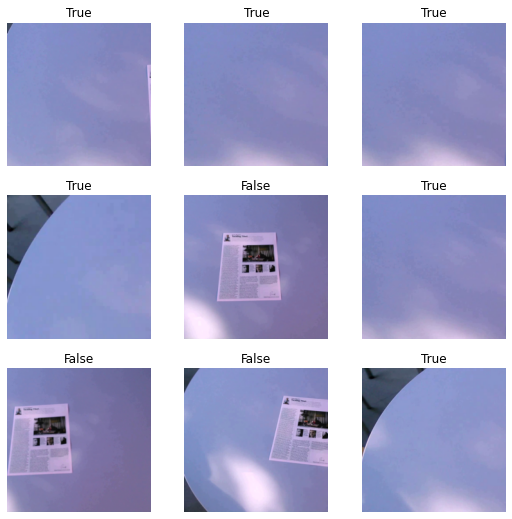

In [61]:
dls_mag.show_batch()